In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


racedata = pd.read_csv("/Users/dillardpace/Desktop/Data Science Projects/archive/races.csv")
rundata = pd.read_csv("/Users/dillardpace/Desktop/Data Science Projects/archive/runs.csv")

In [3]:
#summary statistics, general information, analyzing dataset

racedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race_id             6349 non-null   int64  
 1   date                6349 non-null   object 
 2   venue               6349 non-null   object 
 3   race_no             6349 non-null   int64  
 4   config              6349 non-null   object 
 5   surface             6349 non-null   int64  
 6   distance            6349 non-null   int64  
 7   going               6349 non-null   object 
 8   horse_ratings       6349 non-null   object 
 9   prize               5887 non-null   float64
 10  race_class          6349 non-null   int64  
 11  sec_time1           6349 non-null   float64
 12  sec_time2           6349 non-null   float64
 13  sec_time3           6349 non-null   float64
 14  sec_time4           3634 non-null   float64
 15  sec_time5           821 non-null    float64
 16  sec_ti

In [4]:
rundata.head(5)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [5]:
rundata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

In [6]:
"""
Model #1 will be a binary classification model to predict the variable "won". There will be a race & run dataset for model #1 & #2.
"""

'\nModel #1 will be a binary classification model to predict the variable "won". There will be a race & run dataset for model #1 & #2.\n'

In [7]:
#model1 is the full dataset, merged from races1 and runs1
model1 = pd.merge(racedata, rundata, on="race_id", how="inner")
start_date = min(pd.to_datetime(model1.date)).strftime('%d %B %Y')
end_date = max(pd.to_datetime(model1.date)).strftime('%d %B %Y')
horse_number = model1["horse_id"].nunique()
race_number = model1["race_id"].nunique()

print(f"The data was collected from {start_date} to {end_date}, from {horse_number} individual horses and {race_number} individual races.")

The data was collected from 02 June 1997 to 28 August 2005, from 4405 individual horses and 6348 individual races.


In [8]:
print(model1.nunique())

race_id               6348
date                   682
venue                    2
race_no                 11
config                   6
surface                  2
distance                 9
going                   10
horse_ratings           31
prize                   71
race_class              10
sec_time1              660
sec_time2              501
sec_time3              451
sec_time4              419
sec_time5              285
sec_time6               98
sec_time7                0
time1_x                660
time2_x               1308
time3_x               1715
time4_x               1403
time5_x                551
time6_x                111
time7                    0
place_combination1      14
place_combination2      14
place_combination3      14
place_combination4      10
place_dividend1        279
place_dividend2        315
place_dividend3        368
place_dividend4         15
win_combination1        14
win_dividend1          776
win_combination2         7
win_dividend2           12
h

In [9]:
model1 = model1.drop(columns = ["race_id", "date", "horse_id", 'trainer_id', 'jockey_id', 'horse_no', 'place_combination1', 'place_combination2', 'win_combination1', 'result', 'lengths_behind'])
numeric_feat = model1.select_dtypes(include=['number'])
numeric_feat = [col for col in numeric_feat if model1[col].nunique() >= 50]
print(numeric_feat)

['prize', 'sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6', 'time1_x', 'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x', 'place_dividend1', 'place_dividend2', 'place_dividend3', 'win_dividend1', 'horse_rating', 'declared_weight', 'behind_sec1', 'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1_y', 'time2_y', 'time3_y', 'time4_y', 'time5_y', 'time6_y', 'finish_time', 'win_odds', 'place_odds']


In [10]:
#to count the outliers in each feature (data points outside iqr limits)
def count_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR
        count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"{col}: {count}")

count_outliers(model1, numeric_feat)

prize: 2827
sec_time1: 0
sec_time2: 14
sec_time3: 0
sec_time4: 54
sec_time5: 0
sec_time6: 0
time1_x: 0
time2_x: 0
time3_x: 0
time4_x: 0
time5_x: 342
time6_x: 90
place_dividend1: 3049
place_dividend2: 2829
place_dividend3: 2879
win_dividend1: 3153
horse_rating: 27104
declared_weight: 1
behind_sec1: 19
behind_sec2: 41
behind_sec3: 519
behind_sec4: 788
behind_sec5: 183
behind_sec6: 32
time1_y: 1
time2_y: 8
time3_y: 46
time4_y: 206
time5_y: 56
time6_y: 18
finish_time: 0
win_odds: 0
place_odds: 3386


In [11]:
#remove features that should not have outliers removed
numeric_feat_edit = [col for col in numeric_feat if col not in ["win_odds", "place_odds", "prize", "horse_rating", 'lengths_behind']]

In [12]:
print(numeric_feat_edit)

['sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6', 'time1_x', 'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x', 'place_dividend1', 'place_dividend2', 'place_dividend3', 'win_dividend1', 'declared_weight', 'behind_sec1', 'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1_y', 'time2_y', 'time3_y', 'time4_y', 'time5_y', 'time6_y', 'finish_time']


In [13]:
def remove_outliers_iqr(df, columns, iqr_multiplier=3.0):
    df_clean = df.copy()
    outlier_mask = pd.Series(False, index=df_clean.index)

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (iqr_multiplier * IQR)
        upper_bound = Q3 + (iqr_multiplier * IQR)

        col_outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        outlier_mask |= col_outliers

    print(f"Total rows to drop due to outliers: {outlier_mask.sum()}")
    return df_clean[~outlier_mask]

model1_filtered = remove_outliers_iqr(model1, numeric_feat_edit, iqr_multiplier=3.0)

# Check if the number of rows has changed
print(f"Original shape: {model1.shape}")
print(f"New shape after outlier removal: {model1_filtered.shape}")

Total rows to drop due to outliers: 10680
Original shape: (79447, 62)
New shape after outlier removal: (68767, 62)


<Axes: xlabel='prize'>

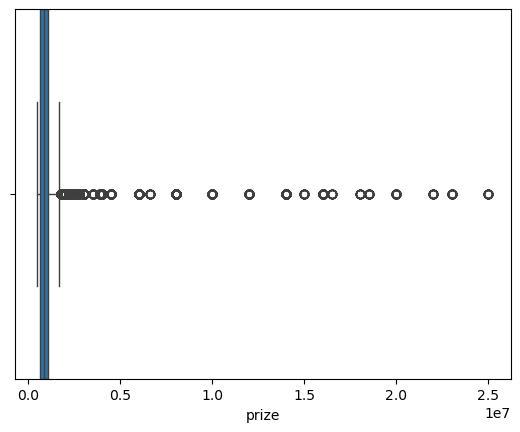

In [14]:
sns.boxplot(x=model1_filtered['prize'], width=1)
plt.show()

In [15]:
scaler = StandardScaler()
model1_scaled = scaler.fit_transform(model1_filtered[numeric_feat_edit])
model1_scaled = pd.DataFrame(model1_scaled, columns=numeric_feat_edit, index=model1_filtered.index)
model1_unscaled = model1_filtered.drop(columns = numeric_feat_edit)
model1_cleaned = pd.concat([model1_unscaled, model1_scaled], axis = 1)
model1_cleaned.head(5)
model1_cleaned.shape

,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time7,time7,place_combination3,place_combination4,place_dividend4,win_combination2,win_dividend2,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,win_odds,place_odds,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,time1_x,time2_x,time3_x,time4_x,time5_x,time6_x,place_dividend1,place_dividend2,place_dividend3,win_dividend1,declared_weight,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1_y,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time
0,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,3,AUS,Gelding,60,--,133,7,6,4,6,10.0,NaN,NaN,9.7,3.7,-1.204854,-1.185582,0.150125,-0.314995,NaN,NaN,-1.204854,-1.248566,-1.174898,-1.134681,NaN,NaN,0.963296,-0.198217,-0.739153,0.753748,-1.366710,-0.569036,-0.784867,-0.885104,0.981491,NaN,NaN,-1.217422,-1.365501,0.047041,0.751215,NaN,NaN,-0.057617
1,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,3,NZ,Gelding,60,--,133,12,12,13,13,8.0,NaN,NaN,16.0,4.9,-1.204854,-1.185582,0.150125,-0.314995,NaN,NaN,-1.204854,-1.248566,-1.174898,-1.134681,NaN,NaN,0.963296,-0.198217,-0.739153,0.753748,-2.010078,1.322687,1.894459,0.303217,0.353703,NaN,NaN,-1.097318,-0.952543,-0.617119,-0.274662,NaN,NaN,-0.077355
2,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,3,NZ,Gelding,60,--,132,8,3,2,2,7.0,NaN,NaN,3.5,1.5,-1.204854,-1.185582,0.150125,-0.314995,NaN,NaN,-1.204854,-1.248566,-1.174898,-1.134681,NaN,NaN,0.963296,-0.198217,-0.739153,0.753748,-0.369489,-0.989419,-1.167627,-1.139745,0.074686,NaN,NaN,-1.244112,-1.365501,0.094481,0.305181,NaN,NaN,-0.086127
3,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,3,SAF,Gelding,60,--,127,13,8,8,11,9.0,NaN,NaN,39.0,11.0,-1.204854,-1.185582,0.150125,-0.314995,NaN,NaN,-1.204854,-1.248566,-1.174898,-1.134681,NaN,NaN,0.963296,-0.198217,-0.739153,0.753748,0.209542,0.061538,0.363416,-0.206063,0.493212,NaN,NaN,-1.177387,-1.117726,-0.142719,0.059863,NaN,NaN,-0.074065
4,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,3,GB,Gelding,60,--,131,14,13,12,12,6.0,NaN,NaN,50.0,14.0,-1.204854,-1.185582,0.150125,-0.314995,NaN,NaN,-1.204854,-1.248566,-1.174898,-1.134681,NaN,NaN,0.963296,-0.198217,-0.739153,0.753748,-2.138751,1.848166,1.798769,0.048577,-0.204330,NaN,NaN,-1.063955,-1.200318,-0.712000,-0.497679,NaN,NaN,-0.094900


(68767, 62)

In [16]:
nan = model1_cleaned.isna().sum()
print(f"number of na values: {nan}")

number of na values: venue                     0
race_no                   0
config                    0
surface                   0
distance                  0
going                     0
horse_ratings             0
prize                  4980
race_class                0
sec_time7             68767
time7                 68767
place_combination3      127
place_combination4    68505
place_dividend4       68505
win_combination2      68657
win_dividend2         68657
won                       0
horse_age                 0
horse_country             2
horse_type                2
horse_rating              0
horse_gear                0
actual_weight             0
draw                      0
position_sec1             0
position_sec2             0
position_sec3             0
position_sec4         29269
position_sec5         60226
position_sec6         67774
win_odds                  0
place_odds             3223
sec_time1                 0
sec_time2                 0
sec_time3                 0

In [17]:
na_list = []

for col in model1_cleaned:
    if model1_cleaned[col].isna().sum()>10000:
        na_list.append(col)
print(na_list)

['sec_time7', 'time7', 'place_combination4', 'place_dividend4', 'win_combination2', 'win_dividend2', 'position_sec4', 'position_sec5', 'position_sec6', 'sec_time4', 'sec_time5', 'sec_time6', 'time4_x', 'time5_x', 'time6_x', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time4_y', 'time5_y', 'time6_y']


In [18]:
model1_clean = model1_cleaned.drop(columns=na_list)
na_check = model1_clean.isna().sum()
print(na_check)

venue                    0
race_no                  0
config                   0
surface                  0
distance                 0
going                    0
horse_ratings            0
prize                 4980
race_class               0
place_combination3     127
won                      0
horse_age                0
horse_country            2
horse_type               2
horse_rating             0
horse_gear               0
actual_weight            0
draw                     0
position_sec1            0
position_sec2            0
position_sec3            0
win_odds                 0
place_odds            3223
sec_time1                0
sec_time2                0
sec_time3                0
time1_x                  0
time2_x                  0
time3_x                  0
place_dividend1          0
place_dividend2          0
place_dividend3        127
win_dividend1            0
declared_weight          0
behind_sec1              0
behind_sec2              0
behind_sec3              0
t

In [19]:
#drop unimportant features with na's and impute na's of important features
model1_clean = model1_clean.drop(columns=['place_dividend3', 'place_combination3'])
model1_clean = model1_clean.dropna(subset=['place_odds', 'horse_country', 'horse_type'])
model1_clean['prize'] = model1_clean['prize'].fillna(model1_clean['prize'].median())

model1_clean.shape

(65542, 39)

In [20]:
model1_clean.isna().sum()

venue              0
race_no            0
config             0
surface            0
distance           0
going              0
horse_ratings      0
prize              0
race_class         0
won                0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
horse_gear         0
actual_weight      0
draw               0
position_sec1      0
position_sec2      0
position_sec3      0
win_odds           0
place_odds         0
sec_time1          0
sec_time2          0
sec_time3          0
time1_x            0
time2_x            0
time3_x            0
place_dividend1    0
place_dividend2    0
win_dividend1      0
declared_weight    0
behind_sec1        0
behind_sec2        0
behind_sec3        0
time1_y            0
time2_y            0
time3_y            0
finish_time        0
dtype: int64

In [21]:
for col in model1_clean:
    if model1_clean[col].nunique()<=15:
        print(f"{col} : {model1_clean[col].nunique()}")

venue : 2
race_no : 11
config : 6
surface : 2
distance : 9
going : 10
race_class : 10
won : 2
horse_age : 9
horse_country : 15
horse_type : 9
draw : 15
position_sec1 : 14
position_sec2 : 14
position_sec3 : 14


In [22]:
model1_clean = pd.get_dummies(model1_clean, columns=['going'], prefix='going')
model1_clean = pd.get_dummies(model1_clean, columns=['horse_type'], prefix='type')
model1_clean = pd.get_dummies(model1_clean, columns=['horse_country'], prefix='country')
model1_clean = pd.get_dummies(model1_clean, columns=['surface'], prefix='surface')
model1_clean = pd.get_dummies(model1_clean, columns=['config'], prefix='config')
model1_clean = pd.get_dummies(model1_clean, columns=['venue'], prefix='venue')
model1_clean[model1_clean.select_dtypes('bool').columns] = model1_clean.select_dtypes('bool').astype(int)


model1_clean.head(5)
model1_clean.shape

,race_no,distance,horse_ratings,prize,race_class,won,horse_age,horse_rating,horse_gear,actual_weight,draw,position_sec1,position_sec2,position_sec3,win_odds,place_odds,sec_time1,sec_time2,sec_time3,time1_x,time2_x,time3_x,place_dividend1,place_dividend2,win_dividend1,declared_weight,behind_sec1,behind_sec2,behind_sec3,time1_y,time2_y,time3_y,finish_time,going_FAST,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,type_Brown,type_Colt,type_Filly,type_Gelding,type_Grey,type_Horse,type_Mare,type_Rig,type_Roan,country_ARG,country_AUS,country_BRZ,country_CAN,country_FR,country_GB,country_GER,country_GR,country_IRE,country_ITY,country_JPN,country_NZ,country_SAF,country_USA,country_ZIM,surface_0,surface_1,config_A,config_A+3,config_B,config_B+2,config_C,config_C+3,venue_HV,venue_ST
0,1,1400,40-15,485000.0,5,0.0,3,60,--,133,7,6,4,6,9.7,3.7,-1.204854,-1.185582,0.150125,-1.204854,-1.248566,-1.174898,0.963296,-0.198217,0.753748,-1.366710,-0.569036,-0.784867,-0.885104,-1.217422,-1.365501,0.047041,-0.057617,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,1,1400,40-15,485000.0,5,0.0,3,60,--,133,12,12,13,13,16.0,4.9,-1.204854,-1.185582,0.150125,-1.204854,-1.248566,-1.174898,0.963296,-0.198217,0.753748,-2.010078,1.322687,1.894459,0.303217,-1.097318,-0.952543,-0.617119,-0.077355,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1,1400,40-15,485000.0,5,0.0,3,60,--,132,8,3,2,2,3.5,1.5,-1.204854,-1.185582,0.150125,-1.204854,-1.248566,-1.174898,0.963296,-0.198217,0.753748,-0.369489,-0.989419,-1.167627,-1.139745,-1.244112,-1.365501,0.094481,-0.086127,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1,1400,40-15,485000.0,5,0.0,3,60,--,127,13,8,8,11,39.0,11.0,-1.204854,-1.185582,0.150125,-1.204854,-1.248566,-1.174898,0.963296,-0.198217,0.753748,0.209542,0.061538,0.363416,-0.206063,-1.177387,-1.117726,-0.142719,-0.074065,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
4,1,1400,40-15,485000.0,5,0.0,3,60,--,131,14,13,12,12,50.0,14.0,-1.204854,-1.185582,0.150125,-1.204854,-1.248566,-1.174898,0.963296,-0.198217,0.753748,-2.138751,1.848166,1.798769,0.048577,-1.063955,-1.200318,-0.712000,-0.094900,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


(65542, 77)

In [23]:
attributes = [col for col in model1_clean.select_dtypes(include=['number']).columns
              if model1_clean[col].nunique()>=50]
winners = round(model1_clean[model1_clean['won']==1][attributes].describe(),2)
not_winners = round(model1_clean[model1_clean['won']==0][attributes].describe(),2)
pd.concat([winners, not_winners], axis = 1, keys = ['winners', 'not_winners'])

winners                                                                                                                                                                                                                                     not_winners                                                                                                                                                                                                                                          
             prize horse_rating win_odds place_odds sec_time1 sec_time2 sec_time3  time1_x  time2_x  time3_x place_dividend1 place_dividend2 win_dividend1 declared_weight behind_sec1 behind_sec2 behind_sec3  time1_y  time2_y  time3_y finish_time        prize horse_rating  win_odds place_odds sec_time1 sec_time2 sec_time3   time1_x   time2_x   time3_x place_dividend1 place_dividend2 win_dividend1 declared_weight behind_sec1 behind_sec2 behind_sec3   time1_y   time2_y   time3_y finish_time
count      5370.00      5370.00  5370.00    5370.00   5370.00   5370.00   5370.00  5370.00  5370.00  5370.00         5370.00         5370.00       5370.00         5370.00     5370.00     5370.00     5370.00  5370.00  5370.00  5370.00     5370.00     60172.00     60172.00  60172.00   60172.00  60172.00  60172.00  60172.00  60172.00  60172.00  60172.00        60172.00        60172.00      60172.00        60172.00    60172.00    60172.00    60172.00  60172.00  60172.00  60172.00    60172.00
mean    1065382.68        61.56     7.44       2.36      0.02      0.02      0.01     0.02     0.02     0.02           -0.01           -0.01         -0.01            0.09       -0.36       -0.43       -0.71    -0.01    -0.03    -0.24       -0.04   1050177.28        60.98     29.85       7.61     -0.00     -0.00      0.00     -0.00     -0.00     -0.00           -0.00            0.00         -0.00           -0.02        0.03        0.04        0.07     -0.00      0.00      0.03        0.00
std     1470723.94        12.78     5.75       1.29      1.00      1.00      1.02     1.00     1.00     1.00            0.99            0.99          0.99            0.99        0.83        0.84        0.62     1.00     1.03     1.09        1.02   1454031.01        10.91     30.14       8.77      1.00      1.00      1.00      1.00      1.00      1.00            1.00            1.00          0.99            1.00        1.01        1.00        1.01      1.00      0.99      0.99        1.00
min      485000.00        19.00     1.00       1.00     -1.40     -2.68     -3.06    -1.40    -1.53    -1.74           -1.07           -1.11         -1.10           -2.91       -1.35       -1.49       -1.39    -1.46    -2.95    -3.34       -1.63    485000.00        10.00      1.20       1.00     -1.40     -2.68     -3.06     -1.40     -1.53     -1.74           -1.07           -1.11         -1.10           -3.28       -1.35       -1.49       -1.36     -1.46     -3.02     -3.08       -1.63
25%      675000.00        60.00     3.40       1.40     -1.18     -0.63     -0.72    -1.18    -1.12    -1.06           -0.73           -0.70         -0.71           -0.58       -0.99       -1.07       -1.22    -1.19    -0.66    -1.06       -0.83    675000.00        60.00      8.40       2.50     -1.18     -0.67     -0.72     -1.18     -1.13     -1.07           -0.69           -0.70         -0.71           -0.71       -0.78       -0.78       -0.72     -1.17     -0.62     -0.69       -0.79
50%      800000.00        60.00     5.60       1.90      0.53      0.01     -0.11     0.53     0.45     0.36           -0.35           -0.32         -0.34            0.06       -0.57       -0.59       -0.89     0.48    -0.07    -0.39       -0.13    800000.00        60.00     16.00       4.40      0.52     -0.02     -0.11      0.52      0.45      0.35           -0.35           -0.32         -0.33           -0.06       -0.15       -0.02       -0.12      0.51     -0.03     -0.07       -0.09
75%     1000000.00        60.00     9.70       2.90      0.69      

<Axes: xlabel='finish_time'>

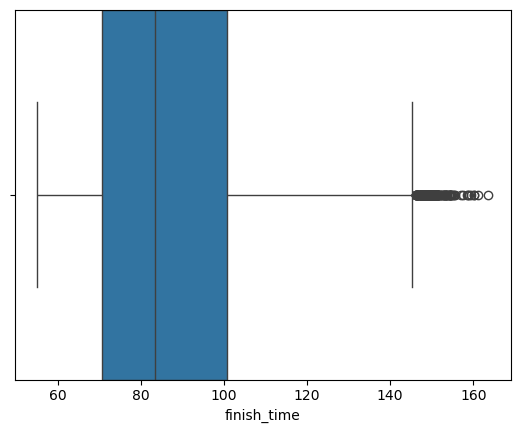

In [24]:
sns.boxplot(x=model1['finish_time'], width=1)
plt.show()

<Axes: xlabel='behind_sec1'>

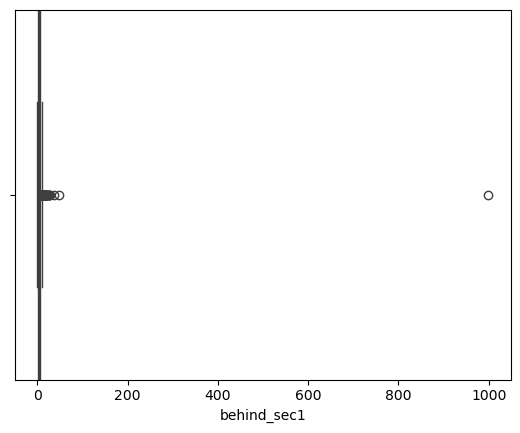

In [25]:
sns.boxplot(x=model1['behind_sec1'], width=1)
plt.show()

In [26]:
corr_data = [col for col in model1_clean.select_dtypes(include='number').columns if col not in ['sec_time1', 'sec_time2', 'sec_time3', 'time1_x', 'time2_x', 'time3_x']
            if model1_clean[col].nunique()>=20]
corr_data = corr_data.copy()
corr_data = model1_clean[corr_data]
corr_data['won'] = model1_clean.loc[corr_data.index, 'won']
corr_data.head(5)
corr_data.shape

/var/folders/7f/dk3sk_3j2dq72rv8r0fgckhh0000gn/T/ipykernel_44203/85696111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['won'] = model1_clean.loc[corr_data.index, 'won']


,prize,horse_rating,actual_weight,win_odds,place_odds,place_dividend1,place_dividend2,win_dividend1,declared_weight,behind_sec1,behind_sec2,behind_sec3,time1_y,time2_y,time3_y,finish_time,won
0,485000.0,60,133,9.7,3.7,0.963296,-0.198217,0.753748,-1.366710,-0.569036,-0.784867,-0.885104,-1.217422,-1.365501,0.047041,-0.057617,0.0
1,485000.0,60,133,16.0,4.9,0.963296,-0.198217,0.753748,-2.010078,1.322687,1.894459,0.303217,-1.097318,-0.952543,-0.617119,-0.077355,0.0
2,485000.0,60,132,3.5,1.5,0.963296,-0.198217,0.753748,-0.369489,-0.989419,-1.167627,-1.139745,-1.244112,-1.365501,0.094481,-0.086127,0.0
3,485000.0,60,127,39.0,11.0,0.963296,-0.198217,0.753748,0.209542,0.061538,0.363416,-0.206063,-1.177387,-1.117726,-0.142719,-0.074065,0.0
4,485000.0,60,131,50.0,14.0,0.963296,-0.198217,0.753748,-2.138751,1.848166,1.798769,0.048577,-1.063955,-1.200318,-0.712000,-0.094900,0.0


(65542, 17)

<Figure size 2500x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'prize'),
  Text(1.5, 0, 'horse_rating'),
  Text(2.5, 0, 'actual_weight'),
  Text(3.5, 0, 'win_odds'),
  Text(4.5, 0, 'place_odds'),
  Text(5.5, 0, 'place_dividend1'),
  Text(6.5, 0, 'place_dividend2'),
  Text(7.5, 0, 'win_dividend1'),
  Text(8.5, 0, 'declared_weight'),
  Text(9.5, 0, 'behind_sec1'),
  Text(10.5, 0, 'behind_sec2'),
  Text(11.5, 0, 'behind_sec3'),
  Text(12.5, 0, 'time1_y'),
  Text(13.5, 0, 'time2_y'),
  Text(14.5, 0, 'time3_y'),
  Text(15.5, 0, 'finish_time'),
  Text(16.5, 0, 'won')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'prize'),
  Text(0, 1.5, 'horse_rating'),
  Text(0, 2.5, 'actual_weight'),
  Text(0, 3.5, 'win_odds'),
  Text(0, 4.5, 'place_odds'),
  Text(0, 5.5, 'place_dividend1'),
  Text(0, 6.5, 'place_dividend2'),
  Text(0, 7.5, 'win_dividend1'),
  Text(0, 8.5, 'declared_weight'),
  Text(0, 9.5, 'behind_sec1'),
  Text(0, 10.5, 'behind_sec2'),
  Text(0, 11.5, 'behind_sec3'),
  Text(0, 12.5, 'time1_y'),
  Text(0, 13.5, 'time2_y'),
  Text(0, 14.5, 'time3_y'),
  Text(0, 15.5, 'finish_time'),
  Text(0, 16.5, 'won')])

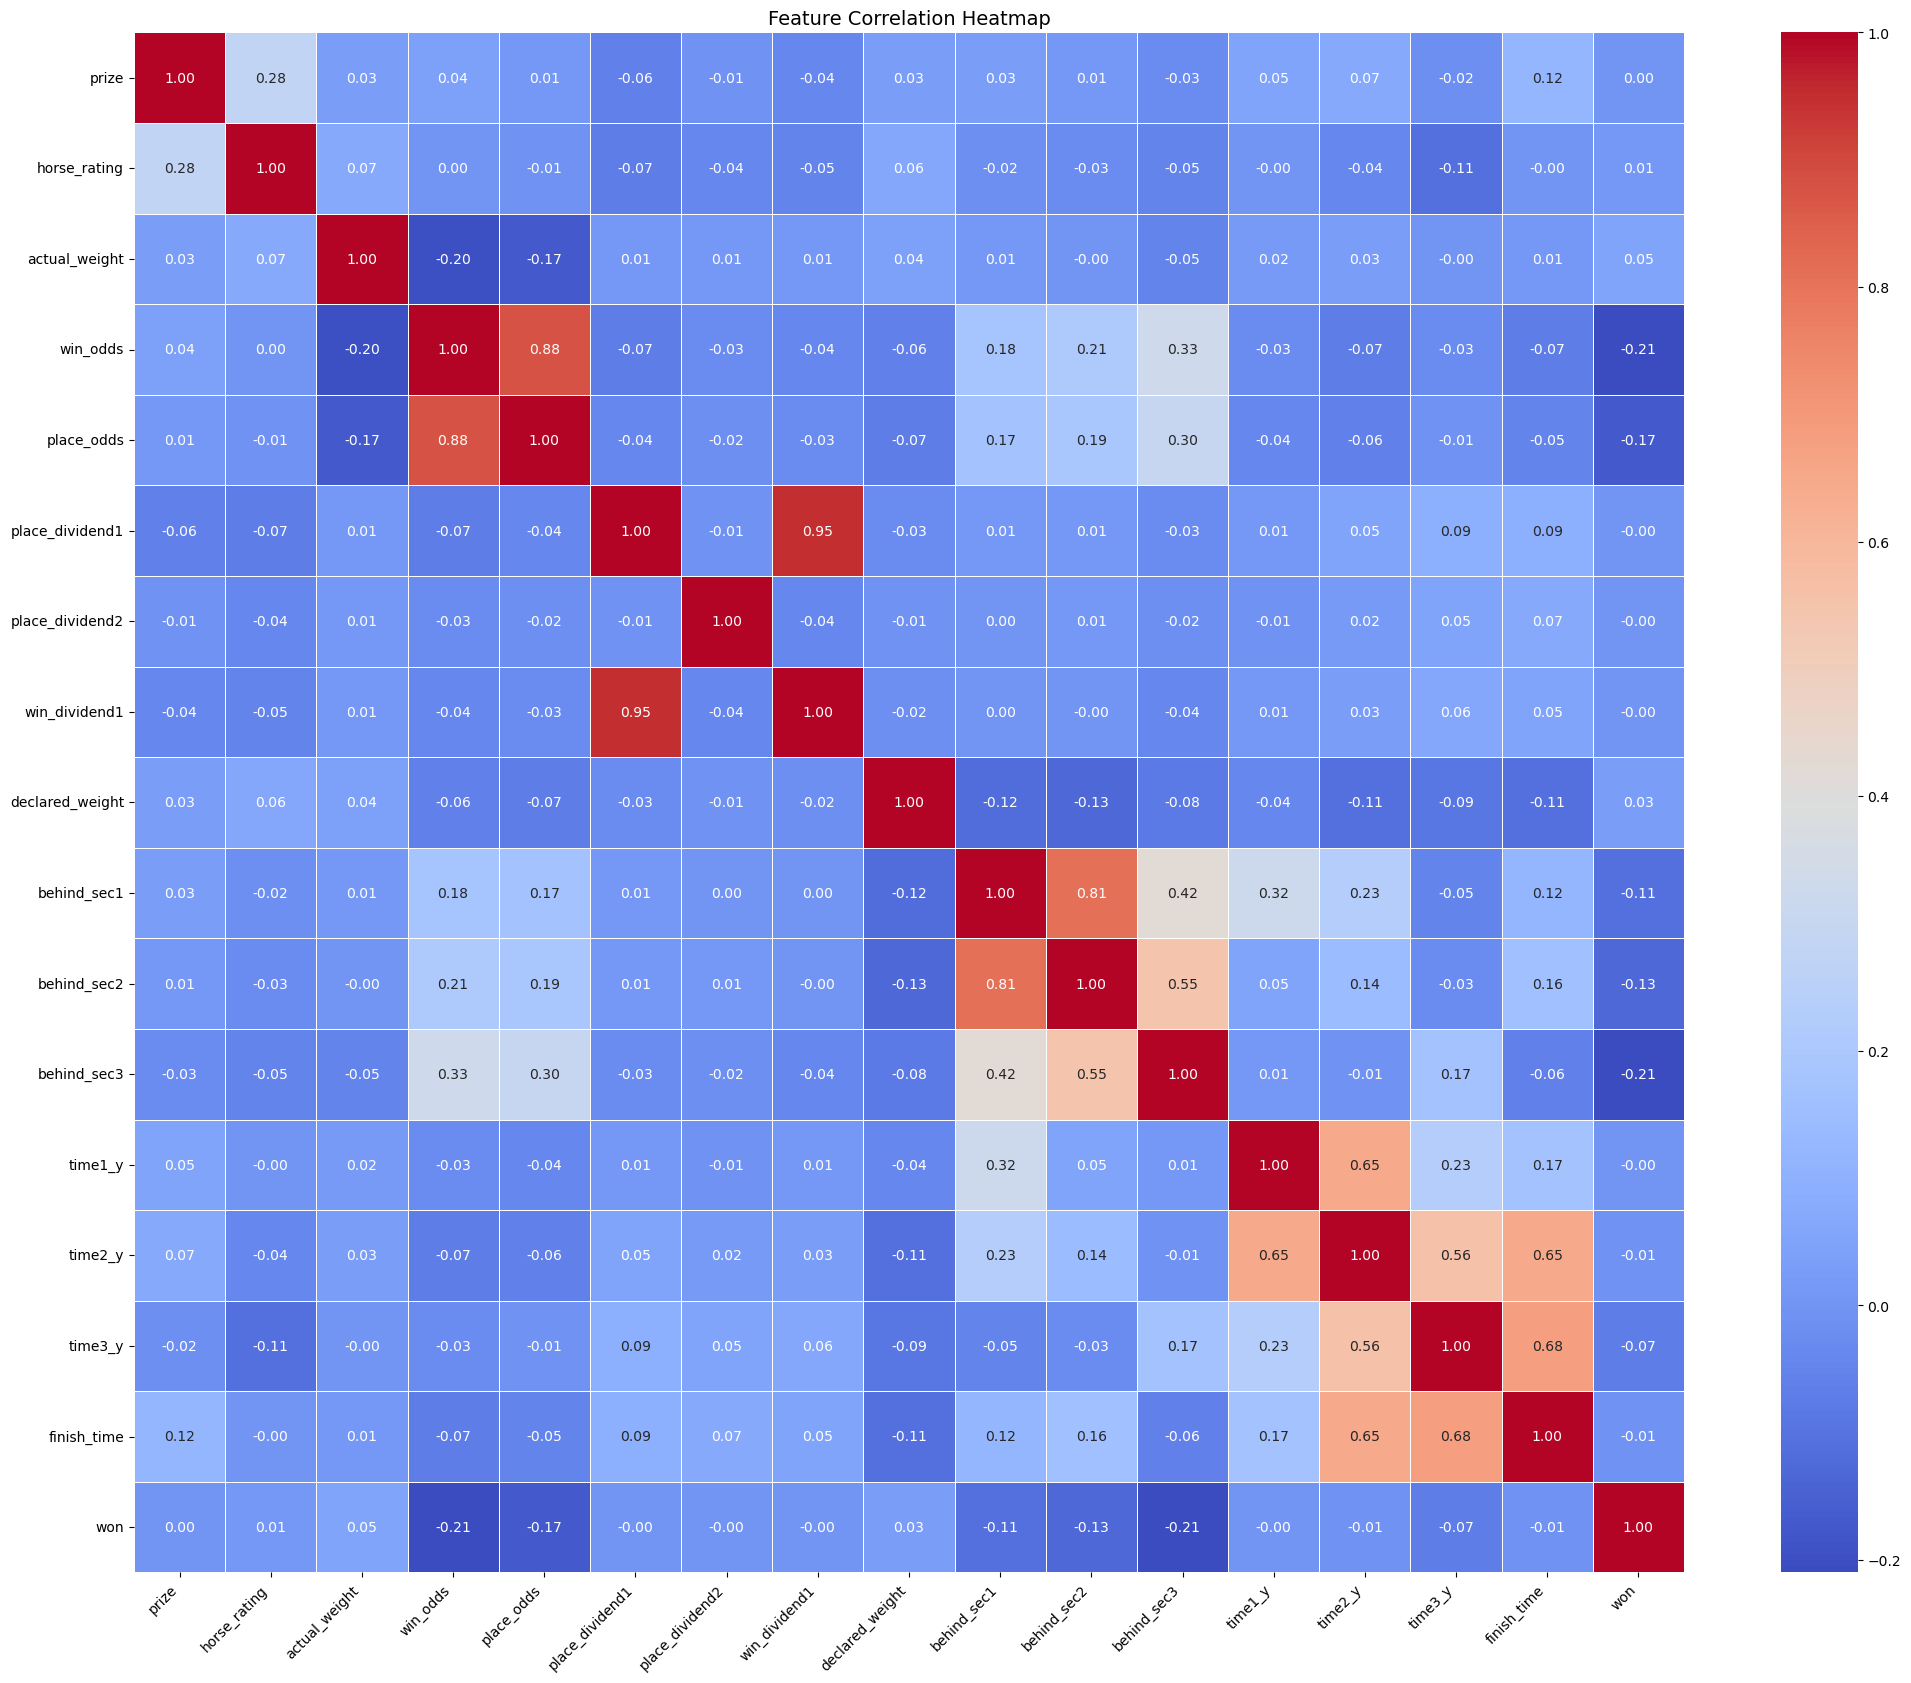

In [27]:
corr = corr_data.corr()
plt.figure(figsize=(25,20))

sns.heatmap(round(corr,2), annot = True, fmt=".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Feature Correlation Heatmap", fontsize = "14")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)

plt.show()

In [28]:
numerical_features = corr_data
for feature in numerical_features:
    corr, p_value = pointbiserialr(corr_data[feature], corr_data['won'])
    print(f"{feature}: correlation={corr:.3f}, p-value={p_value:.3f}")

prize: correlation=0.003, p-value=0.463
horse_rating: correlation=0.015, p-value=0.000
actual_weight: correlation=0.055, p-value=0.000
win_odds: correlation=-0.208, p-value=0.000
place_odds: correlation=-0.169, p-value=0.000
place_dividend1: correlation=-0.003, p-value=0.399
place_dividend2: correlation=-0.004, p-value=0.277
win_dividend1: correlation=-0.002, p-value=0.549
declared_weight: correlation=0.029, p-value=0.000
behind_sec1: correlation=-0.108, p-value=0.000
behind_sec2: correlation=-0.127, p-value=0.000
behind_sec3: correlation=-0.211, p-value=0.000
time1_y: correlation=-0.002, p-value=0.637
time2_y: correlation=-0.008, p-value=0.051
time3_y: correlation=-0.073, p-value=0.000
finish_time: correlation=-0.011, p-value=0.004
won: correlation=1.000, p-value=0.000


In [29]:
categorical_features = []
for col in model1_clean:
    if model1_clean[col].nunique() <= 10 and col not in ['distance', 'won', 'horse_age']:
        categorical_features.append(col)
print(categorical_features)

['race_class', 'going_FAST', 'going_GOOD', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING', 'going_SLOW', 'going_SOFT', 'going_WET FAST', 'going_WET SLOW', 'going_YIELDING', 'going_YIELDING TO SOFT', 'type_Brown', 'type_Colt', 'type_Filly', 'type_Gelding', 'type_Grey', 'type_Horse', 'type_Mare', 'type_Rig', 'type_Roan', 'country_ARG', 'country_AUS', 'country_BRZ', 'country_CAN', 'country_FR', 'country_GB', 'country_GER', 'country_GR', 'country_IRE', 'country_ITY', 'country_JPN', 'country_NZ', 'country_SAF', 'country_USA', 'country_ZIM', 'surface_0', 'surface_1', 'config_A', 'config_A+3', 'config_B', 'config_B+2', 'config_C', 'config_C+3', 'venue_HV', 'venue_ST']


In [30]:
for feature in categorical_features:
    contingency_table = pd.crosstab(model1_clean[feature], model1_clean['won'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: chi2={chi2:.3f}, p-value={p_value:.3f}")


race_class: chi2=11.970, p-value=0.215
going_FAST: chi2=0.000, p-value=1.000
going_GOOD: chi2=0.023, p-value=0.880
going_GOOD TO FIRM: chi2=0.180, p-value=0.671
going_GOOD TO YIELDING: chi2=0.002, p-value=0.962
going_SLOW: chi2=0.000, p-value=1.000
going_SOFT: chi2=0.000, p-value=1.000
going_WET FAST: chi2=0.049, p-value=0.826
going_WET SLOW: chi2=0.082, p-value=0.774
going_YIELDING: chi2=0.027, p-value=0.870
going_YIELDING TO SOFT: chi2=0.000, p-value=1.000
type_Brown: chi2=0.005, p-value=0.945
type_Colt: chi2=0.426, p-value=0.514
type_Filly: chi2=0.647, p-value=0.421
type_Gelding: chi2=0.000, p-value=0.989
type_Grey: chi2=0.000, p-value=1.000
type_Horse: chi2=0.000, p-value=0.985
type_Mare: chi2=0.346, p-value=0.557
type_Rig: chi2=2.722, p-value=0.099
type_Roan: chi2=0.201, p-value=0.654
country_ARG: chi2=0.966, p-value=0.326
country_AUS: chi2=12.249, p-value=0.000
country_BRZ: chi2=0.000, p-value=1.000
country_CAN: chi2=1.241, p-value=0.265
country_FR: chi2=3.291, p-value=0.070
coun

In [31]:
#looking at unique values for code
features = model1_clean.columns.tolist()
for feat in features:
    unique_values = model1_clean[feat].nunique()
    print(f"{feat}: {unique_values}")

race_no: 11
distance: 9
horse_ratings: 30
prize: 67
race_class: 10
won: 2
horse_age: 9
horse_rating: 123
horse_gear: 710
actual_weight: 31
draw: 15
position_sec1: 14
position_sec2: 14
position_sec3: 14
win_odds: 180
place_odds: 166
sec_time1: 614
sec_time2: 475
sec_time3: 431
time1_x: 614
time2_x: 1262
time3_x: 1637
place_dividend1: 137
place_dividend2: 174
win_dividend1: 531
declared_weight: 438
behind_sec1: 60
behind_sec2: 69
behind_sec3: 75
time1_y: 1092
time2_y: 634
time3_y: 553
finish_time: 4522
going_FAST: 2
going_GOOD: 2
going_GOOD TO FIRM: 2
going_GOOD TO YIELDING: 2
going_SLOW: 2
going_SOFT: 2
going_WET FAST: 2
going_WET SLOW: 2
going_YIELDING: 2
going_YIELDING TO SOFT: 2
type_Brown: 2
type_Colt: 2
type_Filly: 2
type_Gelding: 2
type_Grey: 2
type_Horse: 2
type_Mare: 2
type_Rig: 2
type_Roan: 2
country_ARG: 2
country_AUS: 2
country_BRZ: 2
country_CAN: 2
country_FR: 2
country_GB: 2
country_GER: 2
country_GR: 2
country_IRE: 2
country_ITY: 2
country_JPN: 2
country_NZ: 2
country_SAF:

In [32]:
print(model1_clean.select_dtypes(object).columns)

model1_clean = model1_clean.drop(columns=['horse_gear', 'horse_ratings'])

print(model1_clean.select_dtypes(object).columns)

Index(['horse_ratings', 'horse_gear'], dtype='object')
Index([], dtype='object')


In [33]:
scale_features= ['distance','horse_rating','win_odds','place_odds']
model1_clean[scale_features] = scaler.fit_transform(model1_clean[scale_features])
model1_clean.describe()
model1_clean.shape

,race_no,distance,prize,race_class,won,horse_age,horse_rating,actual_weight,draw,position_sec1,position_sec2,position_sec3,win_odds,place_odds,sec_time1,sec_time2,sec_time3,time1_x,time2_x,time3_x,place_dividend1,place_dividend2,win_dividend1,declared_weight,behind_sec1,behind_sec2,behind_sec3,time1_y,time2_y,time3_y,finish_time,going_FAST,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT,type_Brown,type_Colt,type_Filly,type_Gelding,type_Grey,type_Horse,type_Mare,type_Rig,type_Roan,country_ARG,country_AUS,country_BRZ,country_CAN,country_FR,country_GB,country_GER,country_GR,country_IRE,country_ITY,country_JPN,country_NZ,country_SAF,country_USA,country_ZIM,surface_0,surface_1,config_A,config_A+3,config_B,config_B+2,config_C,config_C+3,venue_HV,venue_ST
count,65542.000000,6.554200e+04,6.554200e+04,65542.000000,65542.000000,65542.000000,6.554200e+04,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,6.554200e+04,6.554200e+04,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.00000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000,65542.000000
mean,5.267142,2.714238e-16,1.051423e+06,3.844909,0.081932,3.295505,2.099670e-16,122.735086,6.837417,6.822846,6.807879,6.763663,-3.122216e-17,-1.200712e-16,-0.002086,-0.001327,0.003870,-0.002086,-0.002050,-0.001485,-0.001118,0.003359,-0.003830,-0.006786,0.000675,-0.000139,0.003148,-0.002009,-0.001714,0.005734,0.000913,0.011916,0.647753,0.254280,0.053584,0.002197,0.001602,0.003280,0.00978,0.013625,0.001983,0.026121,0.003326,0.000519,0.950597,0.000244,0.013716,0.002929,0.001938,0.000610,0.001526,0.376064,0.000229,0.001144,0.014678,0.079750,0.004257,0.000473,0.131870,0.000763,0.000732,0.348555,0.008559,0.031262,0.000137,0.891200,0.108800,0.343444,0.090644,0.123676,0.100729,0.184508,0.156999,0.362958,0.637042
std,2.810845,1.000008e+00,1.455401e+06,1.887114,0.274263,0.828578,1.000008e+00,6.315390,3.731121,3.715443,3.709897,3.693088,1.000008e+00,1.000008e+00,1.000121,0.996765,1.003504,1.000121,0.999752,0.999691,0.997078,1.000568,0.994083,0.999787,1.000543,1.000618,1.003428,1.000170,0.995597,1.001727,1.001163,0.108509,0.477674,0.435459,0.225197,0.046822,0.039994,0.057181,0.09841,0.115929,0.044492,0.159495,0.057577,0.022770,0.216711,0.015622,0.116312,0.054045,0.043977,0.024697,0.039031,0.484400,0.015127,0.033808,0.120260,0.270908,0.065106,0.021743,0.338352,0.027610,0.027052,0.476516,0.092121,0.174027,0.011717,0.311391,0.311391,0.474862,0.287105,0.329215,0.300972,0.387901,0.363802,0.480857,0.480857
min,1.000000,-1.514415e+00,4.850000e+05,0.000000,0.000000,2.000000,-4.606613e+00,103.000000,1.000000,1.000000,1.000000,1.000000,-9.133825e-01,-7.242012e-01,-1.398580,-2.679766,-3.064480,-1.398580,-1.534242,-1.735323,-1.069901,-1.109342,-1.104362,-3.280730,-1.346745,-1.492974,-1.394385,-1.460967,-3.017330,-3.344922,-1.634428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,-7.848518e-01,6.7500

(65542, 75)

In [34]:
#training and testing the model
# X = model1_final[['horse_age', 'position_sec1', 'win_odds', 'place_odds', 'actual_weight','finish_time', 'behind_sec1', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING', 'going_SLOW', 'going_SOFT',	'going_WET FAST', 'going_WET SLOW',	'going_YIELDING', 'going_YIELDING TO SOFT']]	 
# y = model1_final['won']

X = model1_clean.drop(['won'],axis=1)
y = model1_clean['won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
model = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=5000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# features = ['horse_age', 'position_sec1', 'win_odds', 'place_odds', 'actual_weight', 'behind_sec1', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING', 'going_SLOW', 'going_SOFT',	'going_WET FAST', 'going_WET SLOW',	'going_YIELDING', 'going_YIELDING TO SOFT'
# 'type_Brown','type_Colt','type_Filly','type_Gelding','type_Grey','type_Horse','type_Mare','type_Rig','type_Roan' ]

features = model1_clean.columns.tolist()

coefficients = model.coef_[0]
intercept = model.intercept_[0]

equation = "Logit(won) = {:.3f}".format(intercept)
for feature, coef in zip(features, coefficients):
    equation += " + ({:.3f} * {})".format(coef, feature)

print("Logistic Regression Equation:")
print(equation)

LogisticRegression(class_weight='balanced', max_iter=5000, solver='liblinear')

Logistic Regression Equation:
Logit(won) = -0.127 + (0.002 * race_no) + (0.806 * distance) + (-0.000 * prize) + (-0.016 * race_class) + (-0.006 * won) + (0.028 * horse_age) + (-0.008 * horse_rating) + (0.019 * actual_weight) + (-0.026 * draw) + (0.085 * position_sec1) + (-0.357 * position_sec2) + (-2.997 * position_sec3) + (-2.038 * win_odds) + (-0.027 * place_odds) + (-0.034 * sec_time1) + (0.973 * sec_time2) + (-0.027 * sec_time3) + (-0.029 * time1_x) + (0.091 * time2_x) + (0.117 * time3_x) + (-0.000 * place_dividend1) + (0.392 * place_dividend2) + (0.042 * win_dividend1) + (-0.013 * declared_weight) + (0.136 * behind_sec1) + (0.107 * behind_sec2) + (-0.062 * behind_sec3) + (-0.015 * time1_y) + (-1.056 * time2_y) + (-0.348 * time3_y) + (-0.037 * finish_time) + (-0.065 * going_FAST) + (-0.048 * going_GOOD) + (-0.025 * going_GOOD TO FIRM) + (0.004 * going_GOOD TO YIELDING) + (-0.021 * going_SLOW) + (-0.013 * going_SOFT) + (-0.011 * going_WET FAST) + (0.079 * going_WET SLOW) + (0.012 * 

In [35]:
print(y_train.value_counts())
print(y_test.value_counts())

won
0.0    48137
1.0     4296
Name: count, dtype: int64
won
0.0    12035
1.0     1074
Name: count, dtype: int64


In [36]:
#evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.749

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84     12035
         1.0       0.23      0.87      0.36      1074

    accuracy                           0.75     13109
   macro avg       0.61      0.80      0.60     13109
weighted avg       0.92      0.75      0.80     13109

Confusion Matrix:
[[8892 3143]
 [ 142  932]]


In [37]:
#predicting probability
sample_data = [3, 5, 0.8, 4.5, 90.2, 1.5, 12.4, 0.5, 120, 0, 0, 1, 0, 0, 0, 0, 0, 0]
z = intercept + sum(coef * value for coef, value in zip(coefficients, sample_data))
probability = 1/(1+np.exp(-z))
print(f"Probability: {probability:.3f}")

Probability: 0.057


In [38]:
#bagging ensemble logistic regression
from sklearn.ensemble import BaggingClassifier
base_model = LogisticRegression(max_iter=5000, class_weight='balanced',solver='liblinear')

bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs= -1
)

bagging_model.fit(X_train,y_train)

y_pred = bagging_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred):.4f}")

BaggingClassifier(estimator=LogisticRegression(class_weight='balanced',
                                               max_iter=5000,
                                               solver='liblinear'),
                  max_samples=0.8, n_jobs=-1, random_state=42)

Accuracy: 0.7502


In [79]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 10,
    class_weight = 'balanced'
)

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,rf_pred):.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test,rf_pred))

RandomForestClassifier(class_weight='balanced', n_estimators=10)

Accuracy: 0.9577
Confusion Matrix:
[[12002    33]
 [  522   552]]
